In [1]:
from google.colab import files
uploaded = files.upload()


Saving healthcare_dataset.csv to healthcare_dataset.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [4]:
import pandas as pd

df = pd.read_csv("healthcare_dataset.csv")  # replace with the exact filename



In [11]:
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head()


Shape: (55500, 15)
Columns: ['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition', 'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider', 'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date', 'Medication', 'Test Results']


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [12]:
# Convert dates
df["Date of Admission"] = pd.to_datetime(df["Date of Admission"], errors="coerce")
df["Discharge Date"]    = pd.to_datetime(df["Discharge Date"], errors="coerce")

# Clean Billing Amount (remove $, commas, text)
df["Billing Amount"] = (
    df["Billing Amount"].astype(str)
    .str.replace(r"[^\d.\-]", "", regex=True)
    .replace("", np.nan)
    .astype(float)
)

# Calculate Length of Stay (LOS)
df["LOS_Days"] = (df["Discharge Date"] - df["Date of Admission"]).dt.days

# Fix Age (drop invalid)
df["Age"] = pd.to_numeric(df["Age"], errors="coerce")
df["Age"] = df["Age"].where((df["Age"]>=0) & (df["Age"]<=120))
df["Age"] = df["Age"].fillna(df["Age"].median())

# Quick missing values check
print(df.isnull().sum())




Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
LOS_Days              0
dtype: int64


/tmp/ipython-input-749101039.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["Medical Condition"], order=df["Medical Condition"].value_counts().index, palette="viridis")


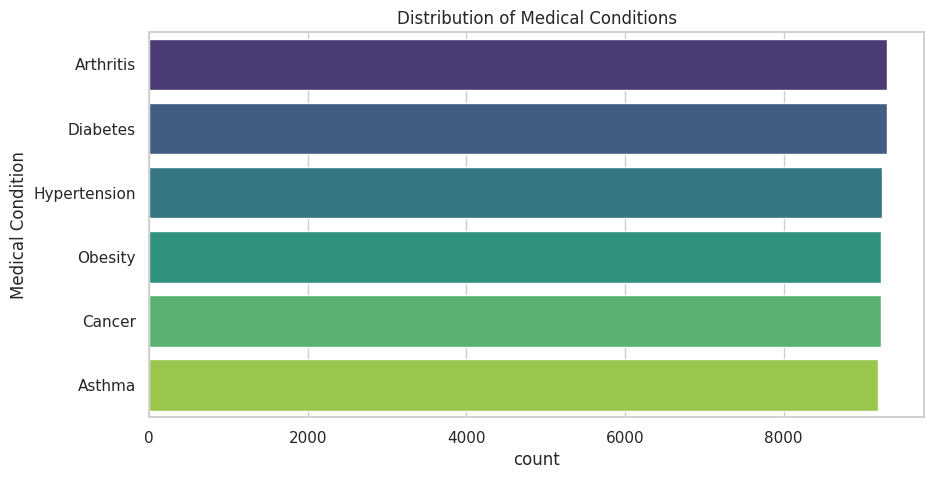

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(y=df["Medical Condition"], order=df["Medical Condition"].value_counts().index, palette="viridis")
plt.title("Distribution of Medical Conditions")
plt.show()


/tmp/ipython-input-1856951173.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Gender"], palette="Set2")


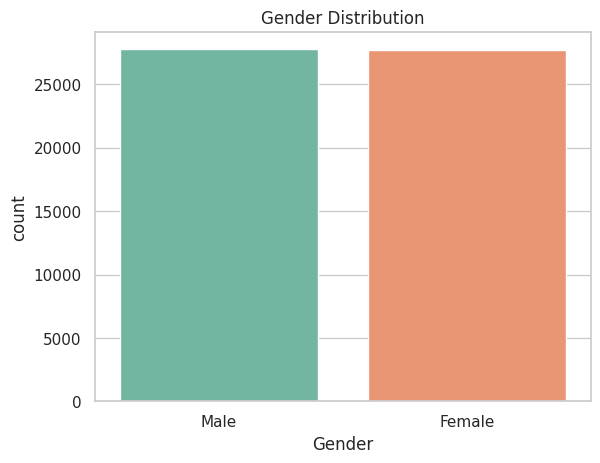

In [14]:
sns.countplot(x=df["Gender"], palette="Set2")
plt.title("Gender Distribution")
plt.show()


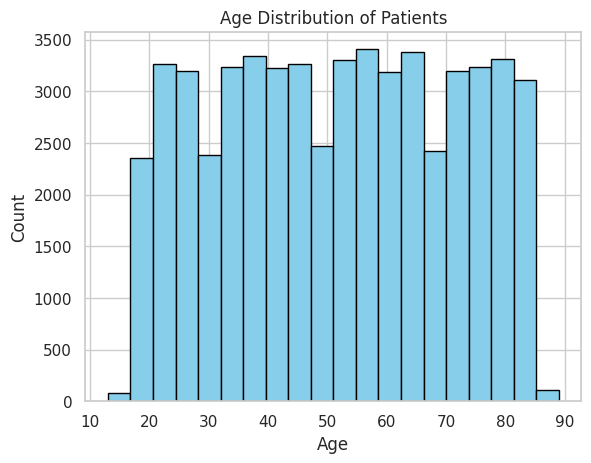

In [15]:
plt.hist(df["Age"], bins=20, color="skyblue", edgecolor="black")
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


/tmp/ipython-input-3115096424.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Test Results"], palette="pastel")


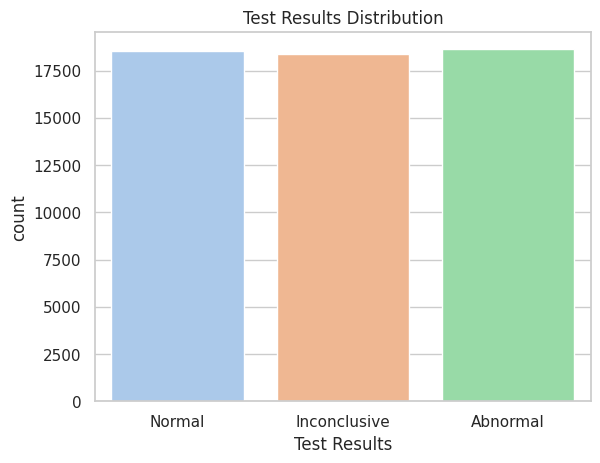

In [16]:
sns.countplot(x=df["Test Results"], palette="pastel")
plt.title("Test Results Distribution")
plt.show()


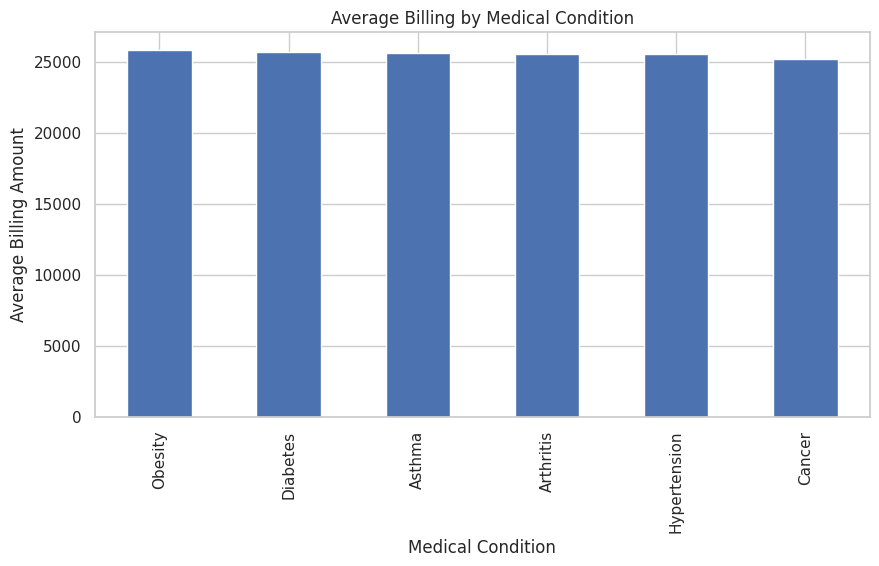

In [17]:
plt.figure(figsize=(10,5))
avg_bill = df.groupby("Medical Condition")["Billing Amount"].mean().sort_values(ascending=False)
avg_bill.plot(kind="bar")
plt.ylabel("Average Billing Amount")
plt.title("Average Billing by Medical Condition")
plt.show()


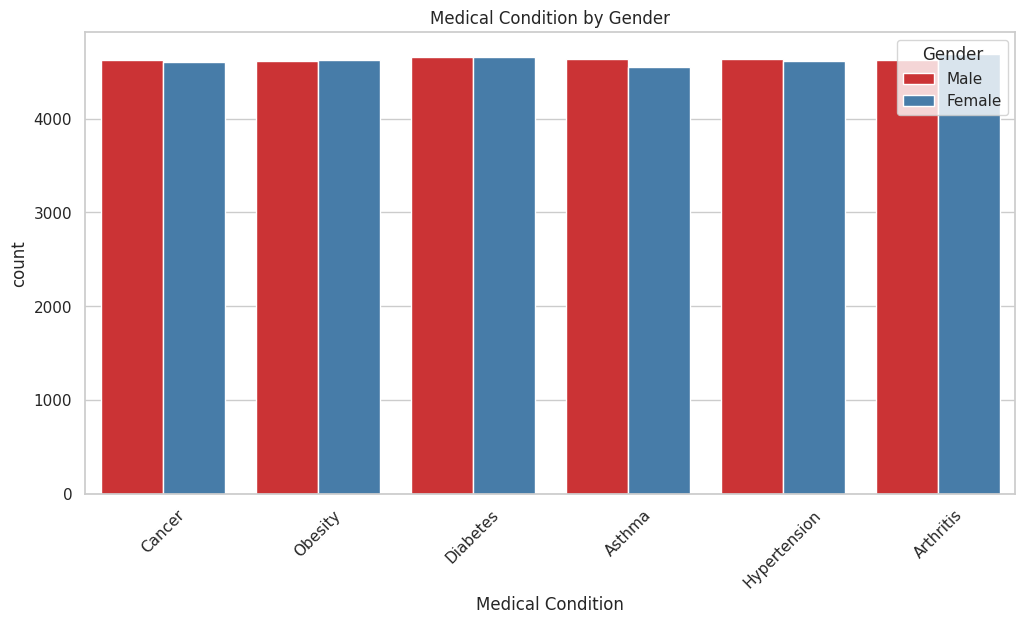

In [18]:
plt.figure(figsize=(12,6))
sns.countplot(x="Medical Condition", hue="Gender", data=df, palette="Set1")
plt.xticks(rotation=45)
plt.title("Medical Condition by Gender")
plt.show()


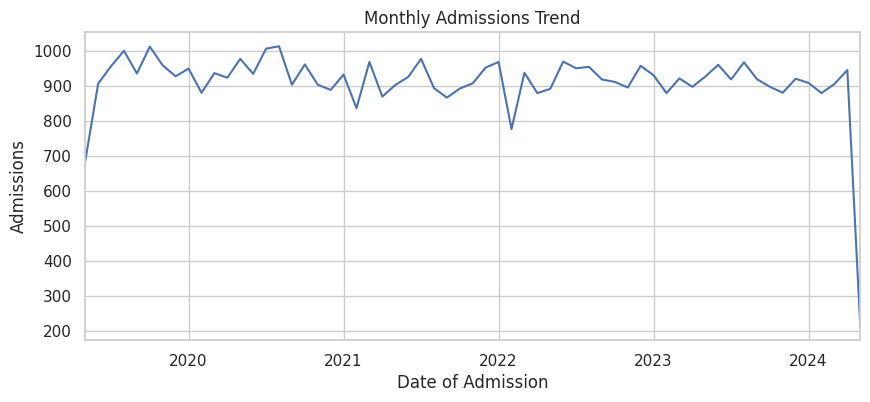

In [19]:
adm_monthly = (
    df.assign(count=1)
      .set_index("Date of Admission")["count"]
      .resample("MS").sum()
)
adm_monthly.plot(figsize=(10,4))
plt.ylabel("Admissions")
plt.title("Monthly Admissions Trend")
plt.show()


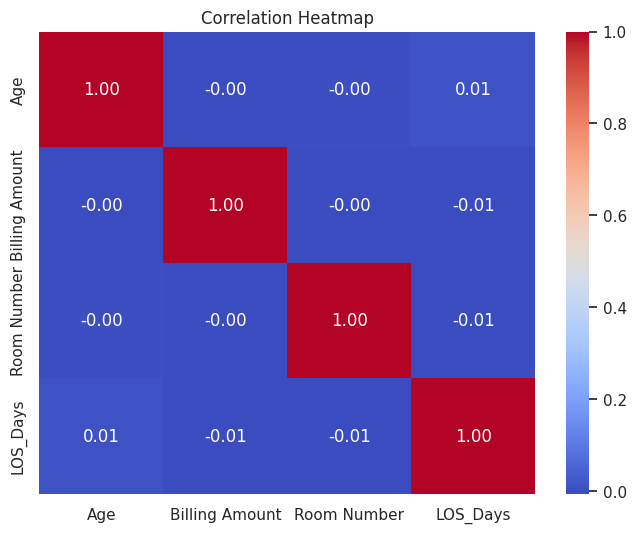

In [20]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [21]:
from scipy.stats import f_oneway

# Create groups of billing amounts by condition
groups = [g["Billing Amount"].dropna() for _, g in df.groupby("Medical Condition")]

stat, p = f_oneway(*groups)
print("ANOVA p-value:", p)

if p < 0.05:
    print("✅ Significant difference in Billing Amounts between conditions")
else:
    print("❌ No significant difference in Billing Amounts between conditions")


ANOVA p-value: 0.055591976677464065
❌ No significant difference in Billing Amounts between conditions
